In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# import model classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import logistic regression
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from feature_engine.encoding import RareLabelEncoder
from feature_engine.creation import CyclicalFeatures
from sklearn.base import BaseEstimator, TransformerMixin
from feature_engine.imputation import MeanMedianImputer

# **1. Business Understanding**

## 1.1 Context 
Bank menghadapi tantangan dalam meningkatkan penjualan produk deposito baru. Sumber daya marketing (telemarketing, promosi) terbatas sehingga perlu strategi targeting yang tepat agar biaya campaign lebih efisien.

## 1.2 Problem Statement
Seringkali, campaign marketing menyasar semua customer tanpa prioritas. Akibatnya, banyak telepon/promosi yang sia-sia karena customer memang tidak berminat atau tidak sesuai profil produk.

The main Question:

- Siapa customer yang paling mungkin membuka deposito baru jika dihubungi campaign?
- Dan apakah benar customer tersebut memang ingin membuka Deposito baru?

Dengan 2 pertanyaan diatas barulah kita bisa Mendirect Model agar bisa memperkecil kemungkinan miss Target call dan mampu memprediksi Target yang sesuai dengan permintaan. 


## 1.3 Goals
3 Goals yang akan dicapai:

- Membangun model prediksi probabilitas konversi deposito untuk tiap customer.

- Conversion rate naik, biaya marketing turun.

- Prioritasi telemarketing ke “high potential leads”.



## 1.4 Analytical Approach
- Mengidentifikasi Faktor Kunci:
    Menganalisis data untuk melihat faktor apa saja yang mendorong nasabah membuka deposito, seperti usia, saldo, dan frekuensi komunikasi.

- Mengenali Pola Perilaku Nasabah Potensial:
    Membandingkan perilaku nasabah yang membuka deposito dengan yang tidak, agar karakteristik utamanya bisa terdeteksi.

- Membuat Indikator Tambahan:
    Menambah indikator seperti intensitas kontak dan jeda waktu antar interaksi untuk memperkuat analisis.

- Segmentasi Peluang Konversi:
    Mengelompokkan nasabah berdasarkan potensi konversi sehingga pemasaran bisa lebih terarah.

- Fokus pada Segmen Potensial:
    Memastikan segmen dengan peluang besar tidak terlewat dan strategi tetap efektif.

- Menjaga Efektivitas Promosi:
    Menyeimbangkan upaya promosi agar tetap tepat sasaran tanpa berlebihan.

- Adaptasi dengan Perubahan Perilaku:
    Secara rutin menyesuaikan strategi agar tetap relevan dengan perubahan perilaku nasabah.


## 1.5 Main Evaluation Metric

### Precision

**Memperkecil kerugian miss target (meminimalisir call sia-sia)**

**Formula:**

```
Precision = TP / (TP + FP)
```

* **TP (True Positive):** Model memprediksi nasabah akan membuka deposito dan ternyata benar.
* **FP (False Positive):** Model memprediksi nasabah akan membuka deposito, namun ternyata tidak.

---

### Recall

**Recall tinggi agar tidak kehilangan peluang (opportunity)**

**Formula:**

```
Recall = TP / (TP + FN)
```

* **FN (False Negative):** Model memprediksi nasabah tidak membuka deposito, namun ternyata nasabah membuka deposito.
* Recall mengukur seberapa banyak peluang nyata yang berhasil ditangkap oleh model.

---

### F1-score

**Digunakan saat bisnis menginginkan keseimbangan antara cost efficiency dan revenue uplift**

**Formula:**

```
F1-score = 2 * (Precision × Recall) / (Precision + Recall)
```

---

### Lift (Top Decile Lift)

**Efektivitas model dalam memilih target yang paling potensial**

**Formula:**

```
Lift = Conversion rate di Top X% leads (score tertinggi) / Conversion rate baseline (semua customer)
```

---

### Business Impact Simulation

**Agar keputusan dari model dapat langsung diterjemahkan ke dalam dampak bisnis nyata (cost saving, revenue, efisiensi)**

**Formula:**

* **Cost Saving:**

```
Cost saving = (Jumlah call yang dihemat) × (Biaya per call)
```

* **Revenue Uplift:**

```
Revenue Uplift = (Tambahan jumlah deposit) × (Rata-rata nilai deposit)
```

* **ROI (Return on Investment):**

```
ROI = (Revenue uplift − Biaya implementasi model) / Biaya implementasi model
```

---

### Tujuan Penggunaan Beragam Metrik

Penggunaan beberapa metrik evaluasi ini bertujuan agar perusahaan mampu mempertimbangkan nilai yang dihasilkan model dari berbagai perspektif bisnis. Hal ini memungkinkan keputusan yang diambil lebih matang karena didukung oleh berbagai opsi yang kuat dan berbasis data.



## 1.6 Expected Outcomes
- Meningkatkan penjualan deposito baru tanpa menambah biaya marketing

- Efisiensi campaign: Lebih sedikit call, lebih banyak deal



## 1.7 Limitation and Challenge

- Hanya fitur-fitur terbatas, tidak ada info behavior transaksi harian

- Data tidak real-time, hanya hasil campaign batch

# **2. Data Understanding**

## 2.1. About Dataset
Deskripsi Singkat Dataset
- Nama file: data_bank.csv

- Jumlah baris: 7.813

- Jumlah kolom: 11

- Target: deposit (yes/no) – apakah nasabah membuka deposito baru.

- Fitur utama:

    > Numerik: age, balance, campaign, pdays

    > Kategorik: job, housing, loan, contact, month, poutcome

    > Target: deposit
---



In [4]:
df = pd.read_csv('data_bank.csv')
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [5]:
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


In [6]:
info = df.info()
shape = df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


## 2.2. Feature Information
| Feature  | Description                | Impact to Business              |
| -------- | -------------------------- | ------------------------------- |
| age      | Umur nasabah               | Bisa Menjadi Patokan dalam Segmentasi marketing            |
| job      | Pekerjaan                  | Preferensi produk, risk profile |
| balance  | Saldo tabungan             | Kemampuan finansial, potensi Target Marketing    |
| housing  | Status kredit rumah        | Beban finansial                 |
| loan     | Status pinjaman lain       | Beban finansial                 |
| contact  | Media komunikasi           | Efektivitas channel komunikasi  |
| month    | Bulan kontak terakhir      | Efek musiman                    |
| campaign | Jumlah kontak              | Risiko spamming                 |
| pdays    | Hari sejak kontak terakhir | Potensi nasabah hangat/dingin   |
| poutcome | Hasil kontak sebelumnya    | Indikasi minat                  |
| deposit  | Buka deposito (Y/N)        | Target prediksi                 |

---


## 2.3. Statistic descriptive Summary
Berdasarkan ringkasan statistik:

- Usia nasabah pada data ini berkisar antara 18 hingga 95 tahun, dengan rata-rata sekitar 41 tahun.

- Saldo tabungan memiliki rata-rata sekitar 1.512, dengan nilai minimum -6.847 dan maksimum 66.653, menunjukkan adanya variasi saldo yang cukup besar di antara nasabah.

- Jumlah kontak kampanye rata-rata dilakukan sekitar 2-3 kali per nasabah, namun ada yang hanya dihubungi sekali dan ada juga yang sampai 63 kali, menandakan sebagian kecil nasabah mendapatkan intensitas kontak yang tinggi.

- Hari sejak kontak terakhir (pdays) sebagian besar bernilai -1 (artinya belum pernah dihubungi sebelumnya), sedangkan rata-ratanya 51 hari dan bisa mencapai hingga 854 hari.

# **3. Data Generation**

In [7]:
# copy the dataset
df_eda = df.copy()  # data ini digunakan untuk process EDA

In [8]:
data_seen, data_unseen = train_test_split(df, test_size=0.2, random_state=42, stratify=df['deposit'])

# Note:
# data unseen jangan diutak atik sama sekali, karena akan digunakan untuk test performa model
# data df digunakan untuk modelling bukan EDA

In [9]:
data_train, data_test = train_test_split(data_seen, test_size=0.2, random_state=42, stratify=data_seen['deposit'])

# **4. Data Eksploration(EDA)**

mencakup Process identifikasi data yang harus dicleaning, dan eksplorasi data sebelum melakukan feature engineer

In [10]:
from skrub import TableReport

report = TableReport(df_eda)
report

Processing column  11 / 11


,,,,,,,,,,,


## 4.1. Clean and Check Process 

1. Cek Bentuk unique value -> Dengan begitu kita jadi mengetahui langkah apa yang akan dilakukan terhadap unique value tersebut.

2. Cek Outlier -> Antara di drop atau dilakukan penanganan lainnya misal; capping, atau feature engineer(buat fitur baru).

3. Melihat Feature -> Mencari tahu apakah ada feature yang harus didrop ataupun Ditambah.

4. Cek Duplicated Data -> Cek full row ataupun partial.

5. Cek imbalance data antara feature dengan target.

6. Perlu ga dicek similarity dari kolom ke kolom lain

7. Cek korelasi antar fitur, apakah dia multicollinearity atau tidak, dan cek apakah ada pengaruh atau tidak terhadap target.

In [11]:
for col in df_eda.columns:
    print(f"{col}: {df_eda[col].nunique()} unique values")
    print(df_eda[col].unique()[:10])  # tampilkan max 10 unique pertama
    print('-'*30)

age: 75 unique values
[55 39 51 38 36 41 37 35 57 23]
------------------------------
job: 12 unique values
['admin.' 'self-employed' 'services' 'housemaid' 'technician' 'management'
 'student' 'blue-collar' 'entrepreneur' 'retired']
------------------------------
balance: 3153 unique values
[ 1662 -3058  3025   -87   205   -76  4803   911   805     0]
------------------------------
housing: 2 unique values
['no' 'yes']
------------------------------
loan: 2 unique values
['no' 'yes']
------------------------------
contact: 3 unique values
['cellular' 'telephone' 'unknown']
------------------------------
month: 12 unique values
['jun' 'apr' 'may' 'nov' 'jan' 'sep' 'feb' 'mar' 'aug' 'jul']
------------------------------
campaign: 32 unique values
[ 2  3  1  4  5  6  7 30  8  9]
------------------------------
pdays: 422 unique values
[ -1 352  21  91 186 263  96 355 294 412]
------------------------------
poutcome: 4 unique values
['unknown' 'other' 'failure' 'success']
------------------

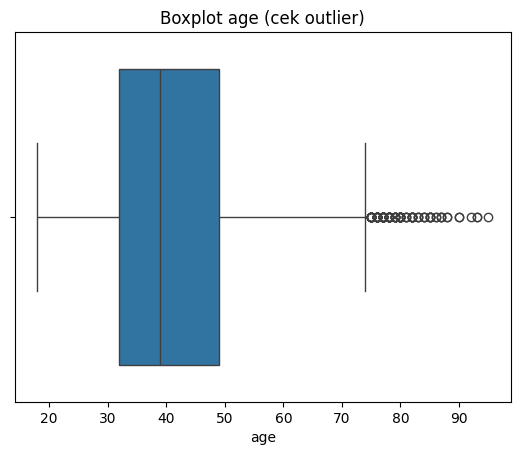

age: Outlier count = 121


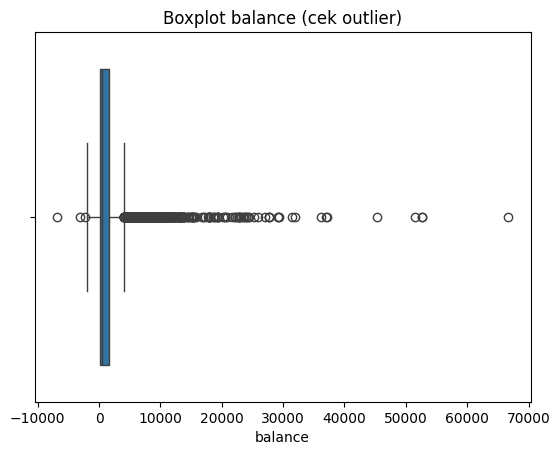

balance: Outlier count = 736


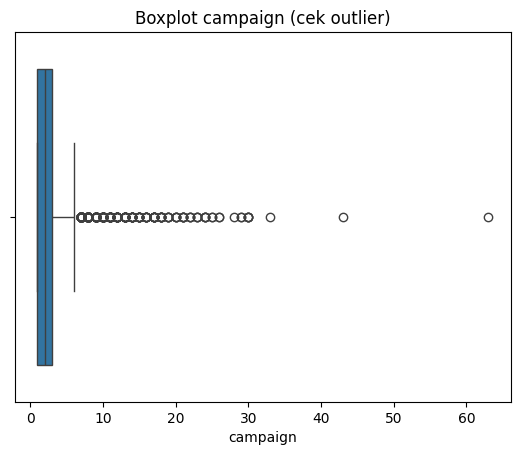

campaign: Outlier count = 429


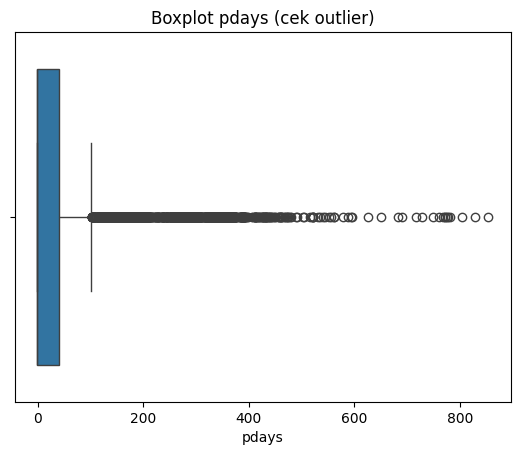

pdays: Outlier count = 1454


In [12]:
# cek outlier
num_cols = df_eda.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure()
    sns.boxplot(x=df_eda[col])
    plt.title(f'Boxplot {col} (cek outlier)')
    plt.show()
    
    q1, q3 = df_eda[col].quantile([0.25,0.75])
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    outlier_count = ((df_eda[col]<lower)|(df_eda[col]>upper)).sum()
    print(f'{col}: Outlier count = {outlier_count}')

In [13]:

# Cek fitur dengan single value
for col in df_eda.columns:
    if df_eda[col].nunique() == 1:
        print(f"{col} hanya punya 1 unique value! Pertimbangkan drop.")

# Cek banyak missing/unknown
for col in df_eda.columns:
    unknown = (df_eda[col] == 'unknown').sum()
    if unknown > 0:
        print(f"{col} punya {unknown} 'unknown' (pseudo-missing)")


job punya 54 'unknown' (pseudo-missing)
contact punya 1639 'unknown' (pseudo-missing)
poutcome punya 5819 'unknown' (pseudo-missing)


In [14]:
# Full duplicate example
full_dupes = df_eda.duplicated().sum()
print(f"Full duplicated rows: {full_dupes}")

# Partial duplicate example (tanpa kolom target, misal)
feature_cols = [col for col in df_eda.columns if col != 'deposit']
partial_dupes = df_eda.duplicated(subset=feature_cols).sum()
print(f"Partial duplicated rows (tanpa target): {partial_dupes}")

Full duplicated rows: 8
Partial duplicated rows (tanpa target): 12


In [15]:
# Hapus duplikat 
df_eda.drop_duplicates(inplace=True)

In [16]:
# cek imbalance antara fitur dengan target

print(df_eda['deposit'].value_counts(normalize=True))
# Untuk fitur kategorik
for col in df_eda.select_dtypes('object').columns:
    if col != 'deposit':
        cross = pd.crosstab(df_eda[col], df_eda['deposit'], normalize='index')
        print(f'\nProporsi target pada tiap kategori {col}:\n{cross}')


deposit
no     0.522101
yes    0.477899
Name: proportion, dtype: float64

Proporsi target pada tiap kategori job:
deposit              no       yes
job                              
admin.         0.525641  0.474359
blue-collar    0.625465  0.374535
entrepreneur   0.601695  0.398305
housemaid      0.608696  0.391304
management     0.489659  0.510341
retired        0.324074  0.675926
self-employed  0.546429  0.453571
services       0.604863  0.395137
student        0.255061  0.744939
technician     0.538402  0.461598
unemployed     0.409639  0.590361
unknown        0.518519  0.481481

Proporsi target pada tiap kategori housing:
deposit        no       yes
housing                    
no       0.422631  0.577369
yes      0.634233  0.365767

Proporsi target pada tiap kategori loan:
deposit        no       yes
loan                       
no       0.498599  0.501401
yes      0.677734  0.322266

Proporsi target pada tiap kategori contact:
deposit          no       yes
contact                 

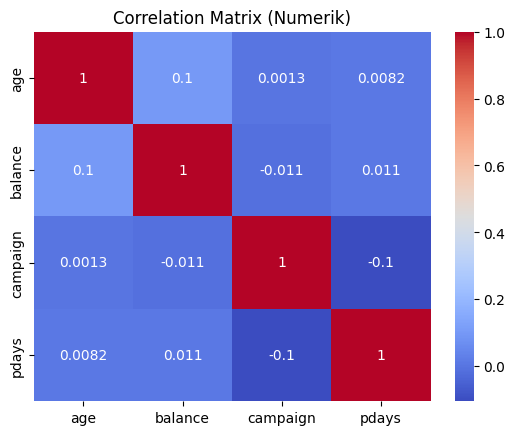

    feature       VIF
0       age  2.251682
1   balance  1.250739
2  campaign  1.748965
3     pdays  1.214343


In [17]:
# Korelasi numerik
corr = df_eda.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerik)')
plt.show()

# Deteksi multicollinearity dengan VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

X = df_eda.select_dtypes(include='number').dropna()
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


In [18]:
df_eda.duplicated().sum()

np.int64(0)

### Rangkuman Hasil Analisa EDA
#### 1. Unique Value Setiap Fitur
Semua kolom memiliki variasi nilai yang sehat (tidak ada kolom dengan hanya satu nilai).

- job: 12 unique (termasuk "unknown").

- contact: 3 unique (cellular, telephone, unknown).

- poutcome: 4 unique (unknown, other, failure, success).

- Fitur numerik (age, balance, campaign, pdays) dan kategorik lain (housing, loan, month) juga punya variasi memadai.

#### 2. Outlier
Boxplot pada fitur numerik (age, balance, campaign, pdays) menunjukkan outlier cukup banyak:

- age: 121 outlier (umumnya usia sangat tua).

- balance: 736 outlier (banyak saldo ekstrem, termasuk saldo minus besar).

- campaign: 429 outlier (jumlah kontak sangat tinggi).

- pdays: 1.454 outlier (hari sejak kontak terakhir ekstrem, banyak -1).

- Outlier cukup signifikan dan dapat mempengaruhi model—perlu diputuskan treatment: capping, transformasi, atau feature engineering khusus.

#### 3. Pseudo-Missing Value
Nilai "unknown" ditemukan di:

- job: 54 baris

- contact: 1.639 baris

- poutcome: 5.819 baris

- Perlu strategi khusus: imputasi, encoding terpisah, atau dikelompokkan sebagai kategori sendiri.

#### 4. Duplikasi Data
- Full duplicated rows: 8 baris persis sama (fitur dan target) – dihapus.

- Partial duplicated (tanpa target): 12 baris, fitur sama tapi target beda – disini kita akan hapus.

#### 5. Imbalance Data
- Distribusi target cukup balance: no 52.2%, yes 47.8%.

- Namun, beberapa fitur kategorik sangat dominan di satu nilai (contoh: "unknown" di contact, "cellular" pada contact), yang harus diwaspadai saat encoding.

#### 6. Proporsi Target pada Setiap Kategori
Proporsi "yes"/"no" sangat bervariasi tergantung kategori fitur:

- job: kategori "retired" dan "student" punya proporsi "yes" tinggi.

- housing: tanpa KPR cenderung "yes".

- loan: tanpa personal loan cenderung "yes".

- poutcome: "success" campaign sebelumnya sangat tinggi peluang "yes".

- month: campaign pada bulan tertentu (mar, oct, sep, dec) proporsi "yes" sangat tinggi.

#### 7. Multicollinearity & Korelasi
- VIF untuk semua fitur numerik < 5 (maks 2.25), tidak ada multicollinearity signifikan.

- Korelasi antar fitur numerik rendah, aman untuk modeling.



1. pastikan model yang kita pakai tidak menyelisihi parameter utama dari model

coba tuning dengan optuna

# **5. Data Preparation**

 Membuat Column Transformer


### 5.1 Define Variable X dan y

In [19]:
X_train = data_train.drop(columns=["deposit"])
y_train = data_train["deposit"]

X_test = data_test.drop(columns=["deposit"])
y_test = data_test["deposit"]

X_unseen = data_unseen.drop(columns=["deposit"])
y_unseen = data_unseen["deposit"]

In [20]:
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)
print("X_unseen:", X_unseen.shape, "y_unseen:", y_unseen.shape)
print("Proporsi target di y_train:\n", y_train.value_counts(normalize=True))
print("Proporsi target di y_test:\n", y_test.value_counts(normalize=True))
print("Proporsi target di y_unseen:\n", y_unseen.value_counts(normalize=True))

X_train: (5000, 10) y_train: (5000,)
X_test: (1250, 10) y_test: (1250,)
X_unseen: (1563, 10) y_unseen: (1563,)
Proporsi target di y_train:
 deposit
no     0.5224
yes    0.4776
Name: proportion, dtype: float64
Proporsi target di y_test:
 deposit
no     0.5224
yes    0.4776
Name: proportion, dtype: float64
Proporsi target di y_unseen:
 deposit
no     0.522073
yes    0.477927
Name: proportion, dtype: float64


### 5.2 Buat Custome Transformer


Dikarenakan Outlier yang sudah terlihat tidak kita hapus, Maka kita buat outlier data tersebut menjadi Feature baru guna memberikan informasi tambahan untuk model, berikut beberapa featurenya :

- is_senior = cust yang umurnya lebih dari 65 tahun
- negative_balance = Cust yang saldonya minus atau kurang dari 0
- high_campaign = Cust yang telah dikontak lebih dari 10
- new_customer = Cust yang belum pernah dikontak

In [21]:

class DepositFeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        X['is_senior'] = (X['age'] >= 65).astype(int)
        X['negative_balance'] = (X['balance'] < 0).astype(int)
        X['high_campaign'] = (X['campaign'] >= 10).astype(int)
        X['new_customer'] = (X['pdays'] == -1).astype(int)
        return X

In [22]:
# custom function testing

deposit_feature = DepositFeatureGenerator()
X_train_fe = deposit_feature.fit_transform(X_train)
X_test_fe = deposit_feature.transform(X_test)

display(deposit_feature.fit_transform(X_train_fe.sample(10)))

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,is_senior,negative_balance,high_campaign,new_customer
5084,50,technician,3117,no,no,cellular,nov,2,164,failure,0,0,0,0
5906,59,retired,1521,yes,yes,unknown,may,2,-1,unknown,0,0,0,1
3044,24,technician,556,yes,no,cellular,nov,2,80,success,0,0,0,0
3930,34,technician,2047,yes,no,cellular,jul,5,-1,unknown,0,0,0,1
4367,25,technician,148,no,no,cellular,jul,1,-1,unknown,0,0,0,1
7239,58,retired,499,yes,yes,cellular,jan,1,-1,unknown,0,0,0,1
4357,26,technician,1066,no,no,cellular,apr,1,-1,unknown,0,0,0,1
7804,52,admin.,423,yes,yes,cellular,oct,2,96,failure,0,0,0,0
1553,70,retired,0,no,no,cellular,sep,1,-1,unknown,1,0,0,1
6915,40,blue-collar,24,yes,no,unknown,may,1,-1,unknown,0,0,0,1


In [23]:
X_train = X_train_fe.reset_index(drop=True)
X_test = X_test_fe.reset_index(drop=True)

In [24]:
from feature_engine.imputation import MeanMedianImputer, AddMissingIndicator
from feature_engine.creation import CyclicalFeatures
from feature_engine.encoding import RareLabelEncoder

In [25]:
# import k-best
from sklearn.feature_selection import SelectKBest, f_classif

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Definisi fitur
num_features = [
    'age', 'balance', 'campaign', 'pdays',
    'is_senior', 'negative_balance', 'high_campaign', 'new_customer'
]
cat_features = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# ColumnTransformer lengkap
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
], remainder="drop", verbose=False )

feature_selector = SelectKBest(score_func=f_classif, k=20)  

pipeline = Pipeline([
    ('feature', DepositFeatureGenerator()),
    ('preprocessing', preprocessor),
    ('selectk', feature_selector),
    ('classifier', LogisticRegression(...))
])

display(num_pipeline, cat_pipeline)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='unknown', strategy='constant')),
                ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [ ]:
pipeline

In [27]:
X_train_pre = deposit_feature.fit_transform(X_train)
X_train_pre = preprocessor.fit_transform(X_train_pre)
fe_overview = pd.DataFrame(X_train_pre, columns=preprocessor.get_feature_names_out())

In [28]:
print("before preprocessing:")
display(X_train.head())
print("after preprocessing:")    
display(fe_overview.head())

before preprocessing:


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,is_senior,negative_balance,high_campaign,new_customer
0,19,student,394,no,no,cellular,apr,3,-1,unknown,0,0,0,1
1,45,blue-collar,-311,yes,no,unknown,may,1,-1,unknown,0,1,0,1
2,37,entrepreneur,8,yes,yes,cellular,jul,1,-1,unknown,0,0,0,1
3,36,admin.,8785,yes,no,cellular,nov,2,-1,unknown,0,0,0,1
4,44,technician,2857,no,no,cellular,aug,2,-1,unknown,0,0,0,1


after preprocessing:


,num__age,num__balance,num__campaign,num__pdays,num__is_senior,num__negative_balance,num__high_campaign,num__new_customer,cat__job_blue-collar,cat__job_entrepreneur,...,cat__month_jul,cat__month_jun,cat__month_mar,cat__month_may,cat__month_nov,cat__month_oct,cat__month_sep,cat__poutcome_other,cat__poutcome_success,cat__poutcome_unknown
0,-1.870839,-0.366486,0.179838,-0.485051,-0.199292,-0.256653,-0.156813,0.585665,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.313288,-0.594850,-0.546194,-0.485051,-0.199292,3.896310,-0.156813,0.585665,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.358751,-0.491519,-0.546194,-0.485051,-0.199292,-0.256653,-0.156813,0.585665,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.442756,2.351535,-0.183178,-0.485051,-0.199292,-0.256653,-0.156813,0.585665,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.229283,0.431331,-0.183178,-0.485051,-0.199292,-0.256653,-0.156813,0.585665,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# 6. Modelling And Evaluation

Setelah melakukan Data preparation, next step yang akan kita lakukan adalah membuat model machine learning.
Perlu diingat bahwa target yang akan kita prediksi adalah **deposit**, yang artinya kita akan mencari siapa target/customer yang akan dituju dalam pelaksanaan campaign. Model yang akan kita buat bertujuan untuk **mengklasifikasi customer berdasarkan persentase kemungkinan menerima campaign**.

Dalam pengklasifikasian, kita gunakan persamaan berikut untuk penentuan label:
- **Yes (1)** → Customer bersedia / berpotensi tinggi untuk melakukan deposit
- **No (0)** → Customer tidak bersedia / berpotensi rendah untuk melakukan deposit

Dengan kata lain, permasalahan ini adalah **binary classification problem** di mana output model berupa probabilitas customer akan melakukan deposit. Nilai probabilitas ini kemudian dapat digunakan untuk melakukan segmentasi:
- **High Potential** → Probabilitas ≥ 70%
- **Medium Potential** → Probabilitas antara 30% dan 70%
- **Low Potential** → Probabilitas < 30%

Segmentasi ini akan menjadi dasar strategi kampanye marketing agar sumber daya dapat difokuskan pada customer yang paling potensial, sehingga dapat memaksimalkan tingkat konversi dan meminimalkan biaya kampanye.


### 6.1 Optuna: Hyperparameter Tuning


In [29]:
# Optuna Hyperparameter Tuning (SelectKBest digabung)
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Scorer yang aman untuk label 'yes'/'no'
f1_yes = make_scorer(f1_score, pos_label='yes')

def objective(trial):
    # Search space
    C = trial.suggest_float('C', 1e-3, 10.0, log=True)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = 'liblinear' if penalty == 'l1' else trial.suggest_categorical('solver', ['liblinear', 'lbfgs'])
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    k_best = trial.suggest_int('k_best', 10, 30)  

    # Bangun pipeline trial 
    pipe_trial = Pipeline([
        ('feature', DepositFeatureGenerator()),
        ('preprocessing', preprocessor),
        ('selectk', SelectKBest(score_func=f_classif, k=k_best)),
        ('classifier', LogisticRegression(
            penalty=penalty,
            C=C,
            solver=solver,
            class_weight=class_weight,
            random_state=42,
            max_iter=2000
        ))
    ])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipe_trial, X_train, y_train, cv=cv, scoring=f1_yes, n_jobs=-1)
    return scores.mean()

sampler = TPESampler(seed=42)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=100, show_progress_bar=True) 

print("Best trial:", study.best_trial.number)
print("Best params:", study.best_params)
print("Best F1 (CV):", round(study.best_value, 4))


[I 2025-08-11 18:16:08,079] A new study created in memory with name: no-name-edeb3a9b-ad7e-44d4-824a-b3ca71ff26f4
Best trial: 0. Best value: 0.621875:   1%|          | 1/100 [00:06<10:07,  6.13s/it]

[I 2025-08-11 18:16:14,210] Trial 0 finished with value: 0.6218747717202244 and parameters: {'C': 0.03148911647956861, 'penalty': 'l1', 'class_weight': None, 'k_best': 13}. Best is trial 0 with value: 0.6218747717202244.


Best trial: 0. Best value: 0.621875:   2%|▏         | 2/100 [00:09<07:47,  4.77s/it]

[I 2025-08-11 18:16:18,033] Trial 1 finished with value: 0.0 and parameters: {'C': 0.0017073967431528124, 'penalty': 'l1', 'class_weight': None, 'k_best': 30}. Best is trial 0 with value: 0.6218747717202244.


Best trial: 3. Best value: 0.658636:   3%|▎         | 3/100 [00:13<06:52,  4.26s/it]

[I 2025-08-11 18:16:21,674] Trial 2 finished with value: 0.6517009817785032 and parameters: {'C': 2.1368329072358767, 'penalty': 'l1', 'class_weight': 'balanced', 'k_best': 21}. Best is trial 2 with value: 0.6517009817785032.
[I 2025-08-11 18:16:21,871] Trial 3 finished with value: 0.6586362635934215 and parameters: {'C': 0.05342937261279776, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 26}. Best is trial 3 with value: 0.6586362635934215.


Best trial: 3. Best value: 0.658636:   5%|▌         | 5/100 [00:13<02:47,  1.76s/it]

[I 2025-08-11 18:16:22,052] Trial 4 finished with value: 0.6332224009733108 and parameters: {'C': 0.006290644294586149, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': None, 'k_best': 29}. Best is trial 3 with value: 0.6586362635934215.


Best trial: 3. Best value: 0.658636:   7%|▋         | 7/100 [00:14<01:22,  1.13it/s]

[I 2025-08-11 18:16:22,291] Trial 5 finished with value: 0.6477478552390185 and parameters: {'C': 7.2866537374910445, 'penalty': 'l1', 'class_weight': 'balanced', 'k_best': 19}. Best is trial 3 with value: 0.6586362635934215.
[I 2025-08-11 18:16:22,443] Trial 6 finished with value: 0.46745720448779293 and parameters: {'C': 0.003077180271250686, 'penalty': 'l1', 'class_weight': None, 'k_best': 23}. Best is trial 3 with value: 0.6586362635934215.


Best trial: 3. Best value: 0.658636:   9%|▉         | 9/100 [00:14<00:45,  1.98it/s]

[I 2025-08-11 18:16:22,612] Trial 7 finished with value: 0.6569902414969899 and parameters: {'C': 0.017654048052495083, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 28}. Best is trial 3 with value: 0.6586362635934215.
[I 2025-08-11 18:16:22,778] Trial 8 finished with value: 0.6371174004894946 and parameters: {'C': 0.24637685958997463, 'penalty': 'l1', 'class_weight': None, 'k_best': 16}. Best is trial 3 with value: 0.6586362635934215.


Best trial: 3. Best value: 0.658636:  10%|█         | 10/100 [00:15<00:36,  2.49it/s]

[I 2025-08-11 18:16:22,948] Trial 9 finished with value: 0.6505211848190179 and parameters: {'C': 0.03586816498627549, 'penalty': 'l2', 'solver': 'liblinear', 'class_weight': None, 'k_best': 26}. Best is trial 3 with value: 0.6586362635934215.
[I 2025-08-11 18:16:23,147] Trial 10 finished with value: 0.6541246010363506 and parameters: {'C': 0.23406119634830094, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 24}. Best is trial 3 with value: 0.6586362635934215.


Best trial: 3. Best value: 0.658636:  12%|█▏        | 12/100 [00:15<00:26,  3.34it/s]

[I 2025-08-11 18:16:23,355] Trial 11 finished with value: 0.6541937224602348 and parameters: {'C': 0.015931596269242548, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 26}. Best is trial 3 with value: 0.6586362635934215.


Best trial: 3. Best value: 0.658636:  13%|█▎        | 13/100 [00:15<00:23,  3.69it/s]

[I 2025-08-11 18:16:23,560] Trial 12 finished with value: 0.6575162469882144 and parameters: {'C': 0.1096591590029465, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 27}. Best is trial 3 with value: 0.6586362635934215.


Best trial: 3. Best value: 0.658636:  14%|█▍        | 14/100 [00:15<00:21,  3.96it/s]

[I 2025-08-11 18:16:23,770] Trial 13 finished with value: 0.6561937877765736 and parameters: {'C': 0.14698251207077206, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 19}. Best is trial 3 with value: 0.6586362635934215.


Best trial: 3. Best value: 0.658636:  16%|█▌        | 16/100 [00:16<00:18,  4.50it/s]

[I 2025-08-11 18:16:23,975] Trial 14 finished with value: 0.654100217674882 and parameters: {'C': 0.7764982205765482, 'penalty': 'l2', 'solver': 'liblinear', 'class_weight': 'balanced', 'k_best': 26}. Best is trial 3 with value: 0.6586362635934215.
[I 2025-08-11 18:16:24,160] Trial 15 finished with value: 0.656436831613521 and parameters: {'C': 0.07890976148310083, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 23}. Best is trial 3 with value: 0.6586362635934215.


Best trial: 3. Best value: 0.658636:  18%|█▊        | 18/100 [00:16<00:17,  4.65it/s]

[I 2025-08-11 18:16:24,386] Trial 16 finished with value: 0.6534187180856492 and parameters: {'C': 0.8387744815011889, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 27}. Best is trial 3 with value: 0.6586362635934215.
[I 2025-08-11 18:16:24,582] Trial 17 finished with value: 0.6580833762447528 and parameters: {'C': 0.07008407697515191, 'penalty': 'l2', 'solver': 'liblinear', 'class_weight': 'balanced', 'k_best': 30}. Best is trial 3 with value: 0.6586362635934215.


Best trial: 3. Best value: 0.658636:  19%|█▉        | 19/100 [00:16<00:17,  4.53it/s]

[I 2025-08-11 18:16:24,816] Trial 18 finished with value: 0.642732858971615 and parameters: {'C': 0.007991081039490547, 'penalty': 'l2', 'solver': 'liblinear', 'class_weight': 'balanced', 'k_best': 29}. Best is trial 3 with value: 0.6586362635934215.


Best trial: 3. Best value: 0.658636:  21%|██        | 21/100 [00:17<00:16,  4.77it/s]

[I 2025-08-11 18:16:25,023] Trial 19 finished with value: 0.6547615167644947 and parameters: {'C': 0.6070621897942364, 'penalty': 'l2', 'solver': 'liblinear', 'class_weight': 'balanced', 'k_best': 30}. Best is trial 3 with value: 0.6586362635934215.
[I 2025-08-11 18:16:25,218] Trial 20 finished with value: 0.6456265681983949 and parameters: {'C': 0.04212088563065161, 'penalty': 'l2', 'solver': 'liblinear', 'class_weight': 'balanced', 'k_best': 10}. Best is trial 3 with value: 0.6586362635934215.


Best trial: 3. Best value: 0.658636:  22%|██▏       | 22/100 [00:17<00:16,  4.80it/s]

[I 2025-08-11 18:16:25,424] Trial 21 finished with value: 0.6557887367300139 and parameters: {'C': 0.11740802383331361, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 24}. Best is trial 3 with value: 0.6586362635934215.


Best trial: 3. Best value: 0.658636:  23%|██▎       | 23/100 [00:17<00:16,  4.78it/s]

[I 2025-08-11 18:16:25,632] Trial 22 finished with value: 0.6549202066138861 and parameters: {'C': 0.30241237508538243, 'penalty': 'l2', 'solver': 'liblinear', 'class_weight': 'balanced', 'k_best': 27}. Best is trial 3 with value: 0.6586362635934215.


Best trial: 3. Best value: 0.658636:  24%|██▍       | 24/100 [00:17<00:15,  4.79it/s]

[I 2025-08-11 18:16:25,840] Trial 23 finished with value: 0.657759154004723 and parameters: {'C': 0.06015853020697089, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 25}. Best is trial 3 with value: 0.6586362635934215.
[I 2025-08-11 18:16:26,039] Trial 24 finished with value: 0.6542045313137641 and parameters: {'C': 0.017630801260931576, 'penalty': 'l2', 'solver': 'liblinear', 'class_weight': 'balanced', 'k_best': 21}. Best is trial 3 with value: 0.6586362635934215.


Best trial: 25. Best value: 0.658761:  27%|██▋       | 27/100 [00:18<00:14,  4.92it/s]

[I 2025-08-11 18:16:26,246] Trial 25 finished with value: 0.658760601934378 and parameters: {'C': 0.053824802473418504, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 25}. Best is trial 25 with value: 0.658760601934378.
[I 2025-08-11 18:16:26,443] Trial 26 finished with value: 0.648148738738872 and parameters: {'C': 0.00819341290717403, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 22}. Best is trial 25 with value: 0.658760601934378.


Best trial: 25. Best value: 0.658761:  28%|██▊       | 28/100 [00:18<00:14,  5.05it/s]

[I 2025-08-11 18:16:26,629] Trial 27 finished with value: 0.6568613279696918 and parameters: {'C': 0.021143636278230668, 'penalty': 'l2', 'solver': 'liblinear', 'class_weight': 'balanced', 'k_best': 28}. Best is trial 25 with value: 0.658760601934378.


Best trial: 25. Best value: 0.658761:  30%|███       | 30/100 [00:18<00:13,  5.07it/s]

[I 2025-08-11 18:16:26,839] Trial 28 finished with value: 0.6582117703809652 and parameters: {'C': 0.06125069901764293, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 18}. Best is trial 25 with value: 0.658760601934378.
[I 2025-08-11 18:16:27,025] Trial 29 finished with value: 0.6284616135007928 and parameters: {'C': 0.03442347537065064, 'penalty': 'l1', 'class_weight': None, 'k_best': 16}. Best is trial 25 with value: 0.658760601934378.


Best trial: 25. Best value: 0.658761:  32%|███▏      | 32/100 [00:19<00:13,  5.03it/s]

[I 2025-08-11 18:16:27,230] Trial 30 finished with value: 0.5944249179753243 and parameters: {'C': 0.0010328378202296117, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 15}. Best is trial 25 with value: 0.658760601934378.
[I 2025-08-11 18:16:27,426] Trial 31 finished with value: 0.6582117703809652 and parameters: {'C': 0.06033293127368128, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 18}. Best is trial 25 with value: 0.658760601934378.


Best trial: 25. Best value: 0.658761:  34%|███▍      | 34/100 [00:19<00:12,  5.10it/s]

[I 2025-08-11 18:16:27,626] Trial 32 finished with value: 0.6580939613128834 and parameters: {'C': 0.04868920676562107, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 18}. Best is trial 25 with value: 0.658760601934378.
[I 2025-08-11 18:16:27,816] Trial 33 finished with value: 0.6517590838251067 and parameters: {'C': 0.16614408223961347, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 13}. Best is trial 25 with value: 0.658760601934378.


Best trial: 25. Best value: 0.658761:  35%|███▌      | 35/100 [00:20<00:12,  5.06it/s]

[I 2025-08-11 18:16:28,017] Trial 34 finished with value: 0.637896076334576 and parameters: {'C': 0.35460822454980484, 'penalty': 'l1', 'class_weight': None, 'k_best': 17}. Best is trial 25 with value: 0.658760601934378.
[I 2025-08-11 18:16:28,215] Trial 35 finished with value: 0.6575763228765946 and parameters: {'C': 0.02451102750003967, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 20}. Best is trial 25 with value: 0.658760601934378.


Best trial: 25. Best value: 0.658761:  38%|███▊      | 38/100 [00:20<00:12,  5.15it/s]

[I 2025-08-11 18:16:28,408] Trial 36 finished with value: 0.4973141234390822 and parameters: {'C': 0.010615915715982801, 'penalty': 'l1', 'class_weight': 'balanced', 'k_best': 13}. Best is trial 25 with value: 0.658760601934378.
[I 2025-08-11 18:16:28,596] Trial 37 finished with value: 0.6249326205121416 and parameters: {'C': 0.004385310603645575, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': None, 'k_best': 20}. Best is trial 25 with value: 0.658760601934378.


Best trial: 25. Best value: 0.658761:  40%|████      | 40/100 [00:20<00:11,  5.16it/s]

[I 2025-08-11 18:16:28,798] Trial 38 finished with value: 0.6513928726120544 and parameters: {'C': 0.078812831798994, 'penalty': 'l1', 'class_weight': 'balanced', 'k_best': 18}. Best is trial 25 with value: 0.658760601934378.
[I 2025-08-11 18:16:28,985] Trial 39 finished with value: 0.6578194622957524 and parameters: {'C': 0.031508669995087425, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 22}. Best is trial 25 with value: 0.658760601934378.


Best trial: 41. Best value: 0.65892:  42%|████▏     | 42/100 [00:21<00:11,  5.05it/s] 

[I 2025-08-11 18:16:29,196] Trial 40 finished with value: 0.6382958357518527 and parameters: {'C': 2.059375886769021, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': None, 'k_best': 21}. Best is trial 25 with value: 0.658760601934378.
[I 2025-08-11 18:16:29,391] Trial 41 finished with value: 0.6589200021379165 and parameters: {'C': 0.05391582437926523, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 18}. Best is trial 41 with value: 0.6589200021379165.


Best trial: 43. Best value: 0.659194:  44%|████▍     | 44/100 [00:21<00:11,  5.05it/s]

[I 2025-08-11 18:16:29,598] Trial 42 finished with value: 0.646909923798965 and parameters: {'C': 0.011696766705514484, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 15}. Best is trial 41 with value: 0.6589200021379165.
[I 2025-08-11 18:16:29,793] Trial 43 finished with value: 0.6591935266557232 and parameters: {'C': 0.054625828904330966, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 18}. Best is trial 43 with value: 0.6591935266557232.


Best trial: 43. Best value: 0.659194:  46%|████▌     | 46/100 [00:22<00:10,  5.00it/s]

[I 2025-08-11 18:16:30,004] Trial 44 finished with value: 0.6533093466017996 and parameters: {'C': 0.20167023209587018, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 19}. Best is trial 43 with value: 0.6591935266557232.
[I 2025-08-11 18:16:30,199] Trial 45 finished with value: 0.6552081043014517 and parameters: {'C': 0.10777536317650797, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 16}. Best is trial 43 with value: 0.6591935266557232.


Best trial: 43. Best value: 0.659194:  47%|████▋     | 47/100 [00:22<00:10,  5.10it/s]

[I 2025-08-11 18:16:30,385] Trial 46 finished with value: 0.6369298570113684 and parameters: {'C': 0.025068879931253715, 'penalty': 'l1', 'class_weight': 'balanced', 'k_best': 15}. Best is trial 43 with value: 0.6591935266557232.
[I 2025-08-11 18:16:30,583] Trial 47 finished with value: 0.6494975549322552 and parameters: {'C': 0.5148362981760278, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 17}. Best is trial 43 with value: 0.6591935266557232.


Best trial: 43. Best value: 0.659194:  49%|████▉     | 49/100 [00:22<00:10,  5.04it/s]

[I 2025-08-11 18:16:30,785] Trial 48 finished with value: 0.6482113125814811 and parameters: {'C': 0.04446026183912147, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': None, 'k_best': 25}. Best is trial 43 with value: 0.6591935266557232.


Best trial: 43. Best value: 0.659194:  51%|█████     | 51/100 [00:23<00:09,  5.11it/s]

[I 2025-08-11 18:16:30,991] Trial 49 finished with value: 0.6558941956371594 and parameters: {'C': 0.14780056216288034, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 19}. Best is trial 43 with value: 0.6591935266557232.
[I 2025-08-11 18:16:31,176] Trial 50 finished with value: 0.6322150368318581 and parameters: {'C': 0.0025628089975743874, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 23}. Best is trial 43 with value: 0.6591935266557232.


Best trial: 43. Best value: 0.659194:  52%|█████▏    | 52/100 [00:23<00:09,  4.96it/s]

[I 2025-08-11 18:16:31,391] Trial 51 finished with value: 0.6586206766966074 and parameters: {'C': 0.05972074544608525, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 18}. Best is trial 43 with value: 0.6591935266557232.
[I 2025-08-11 18:16:31,591] Trial 52 finished with value: 0.6565145360362509 and parameters: {'C': 0.09046552355264484, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 17}. Best is trial 43 with value: 0.6591935266557232.


Best trial: 43. Best value: 0.659194:  55%|█████▌    | 55/100 [00:23<00:08,  5.00it/s]

[I 2025-08-11 18:16:31,808] Trial 53 finished with value: 0.6583653749449921 and parameters: {'C': 0.05263449355366006, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 19}. Best is trial 43 with value: 0.6591935266557232.
[I 2025-08-11 18:16:31,995] Trial 54 finished with value: 0.6538776901184908 and parameters: {'C': 0.01307312035559964, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 20}. Best is trial 43 with value: 0.6591935266557232.


[I 2025-08-11 18:16:32,183] Trial 55 finished with value: 0.6596880391074336 and parameters: {'C': 0.027886961441919957, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 21}. Best is trial 55 with value: 0.6596880391074336.


Best trial: 55. Best value: 0.659688:  57%|█████▋    | 57/100 [00:24<00:08,  5.04it/s]

[I 2025-08-11 18:16:32,384] Trial 56 finished with value: 0.6545003093741573 and parameters: {'C': 0.02905818288369078, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 24}. Best is trial 55 with value: 0.6596880391074336.
[I 2025-08-11 18:16:32,585] Trial 57 finished with value: 0.6583676259286011 and parameters: {'C': 0.03807022173638, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 22}. Best is trial 55 with value: 0.6596880391074336.


Best trial: 55. Best value: 0.659688:  59%|█████▉    | 59/100 [00:24<00:08,  4.95it/s]

[I 2025-08-11 18:16:32,794] Trial 58 finished with value: 0.6521656959384556 and parameters: {'C': 6.358466387206533, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 25}. Best is trial 55 with value: 0.6596880391074336.
[I 2025-08-11 18:16:32,992] Trial 59 finished with value: 0.6565758892941856 and parameters: {'C': 0.018667124247588807, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 28}. Best is trial 55 with value: 0.6596880391074336.


Best trial: 55. Best value: 0.659688:  62%|██████▏   | 62/100 [00:25<00:07,  5.16it/s]

[I 2025-08-11 18:16:33,165] Trial 60 finished with value: 0.6491085477167288 and parameters: {'C': 0.09803838786930354, 'penalty': 'l1', 'class_weight': 'balanced', 'k_best': 14}. Best is trial 55 with value: 0.6596880391074336.
[I 2025-08-11 18:16:33,362] Trial 61 finished with value: 0.6583676259286011 and parameters: {'C': 0.0383308325857572, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 22}. Best is trial 55 with value: 0.6596880391074336.


Best trial: 63. Best value: 0.661719:  64%|██████▍   | 64/100 [00:25<00:07,  5.11it/s]

[I 2025-08-11 18:16:33,562] Trial 62 finished with value: 0.6608045674777693 and parameters: {'C': 0.036688612052919144, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 21}. Best is trial 62 with value: 0.6608045674777693.
[I 2025-08-11 18:16:33,759] Trial 63 finished with value: 0.6617188183162289 and parameters: {'C': 0.0702466324706289, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 21}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  65%|██████▌   | 65/100 [00:25<00:06,  5.08it/s]

[I 2025-08-11 18:16:33,958] Trial 64 finished with value: 0.6587642361441763 and parameters: {'C': 0.1261009123225122, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 21}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  67%|██████▋   | 67/100 [00:26<00:06,  5.01it/s]

[I 2025-08-11 18:16:34,170] Trial 65 finished with value: 0.6577800273893699 and parameters: {'C': 0.19499761356145337, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 20}. Best is trial 63 with value: 0.6617188183162289.
[I 2025-08-11 18:16:34,367] Trial 66 finished with value: 0.6591969365614755 and parameters: {'C': 0.1287661590359785, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 21}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  68%|██████▊   | 68/100 [00:26<00:06,  4.94it/s]

[I 2025-08-11 18:16:34,575] Trial 67 finished with value: 0.6545620675511851 and parameters: {'C': 0.29503938033269267, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 21}. Best is trial 63 with value: 0.6617188183162289.
[I 2025-08-11 18:16:34,774] Trial 68 finished with value: 0.6564982124867946 and parameters: {'C': 0.11989083894679357, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 23}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  71%|███████   | 71/100 [00:27<00:05,  4.96it/s]

[I 2025-08-11 18:16:34,987] Trial 69 finished with value: 0.6475165333172597 and parameters: {'C': 0.08280350515317325, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': None, 'k_best': 21}. Best is trial 63 with value: 0.6617188183162289.
[I 2025-08-11 18:16:35,181] Trial 70 finished with value: 0.6584863502787907 and parameters: {'C': 0.13914325500202568, 'penalty': 'l2', 'solver': 'liblinear', 'class_weight': 'balanced', 'k_best': 20}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  73%|███████▎  | 73/100 [00:27<00:05,  5.00it/s]

[I 2025-08-11 18:16:35,393] Trial 71 finished with value: 0.6567836992167033 and parameters: {'C': 0.06674696283998663, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 23}. Best is trial 63 with value: 0.6617188183162289.
[I 2025-08-11 18:16:35,582] Trial 72 finished with value: 0.6564497190715644 and parameters: {'C': 0.02559248107882208, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 22}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  74%|███████▍  | 74/100 [00:27<00:05,  4.98it/s]

[I 2025-08-11 18:16:35,785] Trial 73 finished with value: 0.6579630852350633 and parameters: {'C': 0.0473634520276291, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 19}. Best is trial 63 with value: 0.6617188183162289.
[I 2025-08-11 18:16:35,982] Trial 74 finished with value: 0.6576351986593572 and parameters: {'C': 0.016408635272175964, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 21}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  77%|███████▋  | 77/100 [00:28<00:04,  4.97it/s]

[I 2025-08-11 18:16:36,193] Trial 75 finished with value: 0.6617025258349629 and parameters: {'C': 0.08350440176103874, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 21}. Best is trial 63 with value: 0.6617188183162289.
[I 2025-08-11 18:16:36,391] Trial 76 finished with value: 0.6610058951151047 and parameters: {'C': 0.07826667053925554, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 21}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  78%|███████▊  | 78/100 [00:28<00:04,  4.97it/s]

[I 2025-08-11 18:16:36,591] Trial 77 finished with value: 0.6610014636947217 and parameters: {'C': 0.07896115176583726, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 20}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  79%|███████▉  | 79/100 [00:28<00:04,  4.93it/s]

[I 2025-08-11 18:16:36,798] Trial 78 finished with value: 0.655601113468852 and parameters: {'C': 0.22674423568494356, 'penalty': 'l2', 'solver': 'liblinear', 'class_weight': 'balanced', 'k_best': 20}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  80%|████████  | 80/100 [00:29<00:04,  4.53it/s]

[I 2025-08-11 18:16:37,058] Trial 79 finished with value: 0.6550378713504756 and parameters: {'C': 0.07944568967800343, 'penalty': 'l1', 'class_weight': 'balanced', 'k_best': 21}. Best is trial 63 with value: 0.6617188183162289.
[I 2025-08-11 18:16:37,259] Trial 80 finished with value: 0.6500748330598081 and parameters: {'C': 0.03388417562620649, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': None, 'k_best': 22}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  82%|████████▏ | 82/100 [00:29<00:03,  4.69it/s]

[I 2025-08-11 18:16:37,469] Trial 81 finished with value: 0.65869819374547 and parameters: {'C': 0.09448783389279386, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 19}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  83%|████████▎ | 83/100 [00:29<00:03,  4.70it/s]

[I 2025-08-11 18:16:37,681] Trial 82 finished with value: 0.6615699169600918 and parameters: {'C': 0.07430833559440952, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 21}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  84%|████████▍ | 84/100 [00:30<00:03,  4.68it/s]

[I 2025-08-11 18:16:37,896] Trial 83 finished with value: 0.654431078484842 and parameters: {'C': 0.16331286965600725, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 23}. Best is trial 63 with value: 0.6617188183162289.
[I 2025-08-11 18:16:38,095] Trial 84 finished with value: 0.6611441940383487 and parameters: {'C': 0.07753772286661322, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 21}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  86%|████████▌ | 86/100 [00:30<00:02,  4.93it/s]

[I 2025-08-11 18:16:38,283] Trial 85 finished with value: 0.6615699169600918 and parameters: {'C': 0.07348164468181022, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 21}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  88%|████████▊ | 88/100 [00:30<00:02,  4.94it/s]

[I 2025-08-11 18:16:38,495] Trial 86 finished with value: 0.6602887440360375 and parameters: {'C': 0.0717539591823069, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 22}. Best is trial 63 with value: 0.6617188183162289.
[I 2025-08-11 18:16:38,689] Trial 87 finished with value: 0.6562251581183858 and parameters: {'C': 0.10755101733438606, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 24}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  89%|████████▉ | 89/100 [00:31<00:02,  4.93it/s]

[I 2025-08-11 18:16:38,894] Trial 88 finished with value: 0.6601515924033902 and parameters: {'C': 0.07270244688619582, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 22}. Best is trial 63 with value: 0.6617188183162289.
[I 2025-08-11 18:16:39,093] Trial 89 finished with value: 0.6541981168586016 and parameters: {'C': 0.37133090299316696, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 22}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  92%|█████████▏| 92/100 [00:31<00:01,  5.00it/s]

[I 2025-08-11 18:16:39,294] Trial 90 finished with value: 0.6572432414954771 and parameters: {'C': 0.04324390959732305, 'penalty': 'l2', 'solver': 'liblinear', 'class_weight': 'balanced', 'k_best': 23}. Best is trial 63 with value: 0.6617188183162289.
[I 2025-08-11 18:16:39,491] Trial 91 finished with value: 0.6598615387123417 and parameters: {'C': 0.08147600748521419, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 22}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  93%|█████████▎| 93/100 [00:31<00:01,  4.94it/s]

[I 2025-08-11 18:16:39,699] Trial 92 finished with value: 0.6603338825164953 and parameters: {'C': 0.06779498990873918, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 20}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 63. Best value: 0.661719:  94%|█████████▍| 94/100 [00:31<00:01,  4.87it/s]

[I 2025-08-11 18:16:39,913] Trial 93 finished with value: 0.6595119600060503 and parameters: {'C': 0.10392063495790121, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 20}. Best is trial 63 with value: 0.6617188183162289.


Best trial: 94. Best value: 0.661734:  95%|█████████▌| 95/100 [00:32<00:01,  4.79it/s]

[I 2025-08-11 18:16:40,128] Trial 94 finished with value: 0.6617339790662542 and parameters: {'C': 0.06770926501182994, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 21}. Best is trial 94 with value: 0.6617339790662542.


Best trial: 94. Best value: 0.661734:  96%|█████████▌| 96/100 [00:32<00:00,  4.69it/s]

[I 2025-08-11 18:16:40,351] Trial 95 finished with value: 0.65735199830614 and parameters: {'C': 0.19275804066670077, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 20}. Best is trial 94 with value: 0.6617339790662542.
[I 2025-08-11 18:16:40,550] Trial 96 finished with value: 0.6492069951334336 and parameters: {'C': 0.06310197768485039, 'penalty': 'l1', 'class_weight': 'balanced', 'k_best': 19}. Best is trial 94 with value: 0.6617339790662542.


Best trial: 94. Best value: 0.661734:  98%|█████████▊| 98/100 [00:32<00:00,  4.83it/s]

[I 2025-08-11 18:16:40,752] Trial 97 finished with value: 0.6595139668078733 and parameters: {'C': 0.044482539934265236, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 20}. Best is trial 94 with value: 0.6617339790662542.
[I 2025-08-11 18:16:40,952] Trial 98 finished with value: 0.647274909148129 and parameters: {'C': 0.03473252156763585, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': None, 'k_best': 21}. Best is trial 94 with value: 0.6617339790662542.


Best trial: 94. Best value: 0.661734: 100%|██████████| 100/100 [00:33<00:00,  3.02it/s]

[I 2025-08-11 18:16:41,152] Trial 99 finished with value: 0.6561888824061004 and parameters: {'C': 0.022427604868860498, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 19}. Best is trial 94 with value: 0.6617339790662542.
Best trial: 94
Best params: {'C': 0.06770926501182994, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': 'balanced', 'k_best': 21}
Best F1 (CV): 0.6617


### 6.2 Fit Final pipeline dengan best params

In [30]:
from sklearn.metrics import (classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

Testing result Tuning dengan Optuna, result diambil dengan model yang belajar dari data train, dan langsung ditest menggunakan data testing.

In [31]:
# Train final model (pakai hasil Optuna)
best = study.best_params

pipeline_optuna = Pipeline([
    ('feature', DepositFeatureGenerator()),
    ('preprocessing', preprocessor),
    ('selectk', SelectKBest(score_func=f_classif, k=best['k_best'])),
    ('classifier', LogisticRegression(
        penalty=best['penalty'],
        C=best['C'],
        solver=best.get('solver', 'liblinear'),
        class_weight=best.get('class_weight', None),
        random_state=42,
        max_iter=2000
    ))
])

pipeline_optuna.fit(X_train, y_train)

y_pred_opt = pipeline_optuna.predict(X_test)
y_proba_opt = pipeline_optuna.predict_proba(X_test)[:, 1]


print("Classification Report (Optuna):")
print(classification_report(y_test, y_pred_opt, digits=3))
print(f"Accuracy : {accuracy_score(y_test, y_pred_opt):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_opt, pos_label='yes'):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred_opt, pos_label='yes'):.3f}")
print(f"F1       : {f1_score(y_test, y_pred_opt, pos_label='yes'):.3f}")
print(f"AUC      : {roc_auc_score((y_test=='yes').astype(int), y_proba_opt):.3f}")


Classification Report (Optuna):
              precision    recall  f1-score   support

          no      0.701     0.708     0.704       653
         yes      0.677     0.670     0.673       597

    accuracy                          0.690      1250
   macro avg      0.689     0.689     0.689      1250
weighted avg      0.689     0.690     0.690      1250

Accuracy : 0.690
Precision: 0.677
Recall   : 0.670
F1       : 0.673
AUC      : 0.760


In [32]:
pipeline_optuna

Pipeline(steps=[('feature', DepositFeatureGenerator()),
                ('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays', 'is_senior',
                                                   'negative_balance',
                                                   'high_campaign',
                                                   'new_customer']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome'])])),
                ('selectk', SelectKBest(k=21)),
                ('classifier',
                 LogisticRegression(C=0.06770926501182994,
                                    class_weight='balanced', max_iter=2000,
                                    random_state=42))])

### 6.2.1. Komparasi performa antara Optuna dengan Base Pipeline

== TEST SUMMARY ==


,accuracy,precision,recall,f1,AUC,TP,FP,FN,top_decile_lift
model,,,,,,,,,
Baseline (TEST),0.694,0.693,0.647,0.669,0.76,386,171,211,1.893
Optuna (TEST),0.690,0.677,0.670,0.673,0.76,400,191,197,1.926



== UNSEEN SUMMARY ==


,accuracy,precision,recall,f1,AUC,TP,FP,FN,top_decile_lift
model,,,,,,,,,
Baseline (UNSEEN),0.708,0.713,0.649,0.680,0.768,485,195,262,1.931
Optuna (UNSEEN),0.706,0.700,0.675,0.687,0.768,504,216,243,1.918


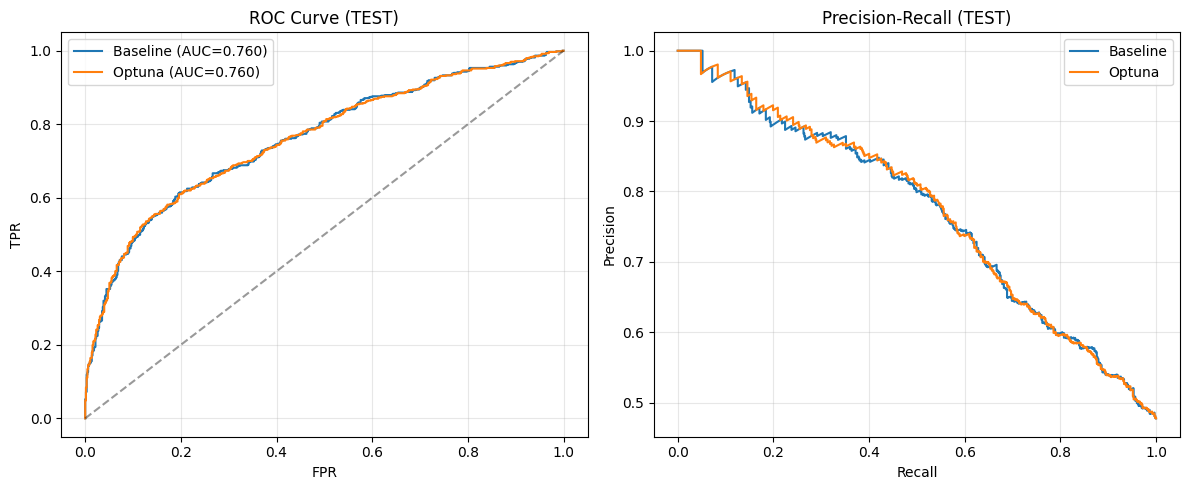

✅ Saved: compare_baseline_optuna_TEST.csv (+ UNSEEN)


In [33]:
# === Compare Baseline vs Optuna (TEST + UNSEEN) ===

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, precision_recall_curve,
                             confusion_matrix, classification_report)

def build_baseline_pipeline(k_best=20, C=1.0):
    return Pipeline([
        ('feature', DepositFeatureGenerator()),
        ('preprocessing', preprocessor),
        ('selectk', SelectKBest(score_func=f_classif, k=k_best)),
        ('classifier', LogisticRegression(
            penalty='l2',        
            solver='liblinear',  
            C=C,
            class_weight='balanced',
            random_state=42,
            max_iter=2000
        ))
    ])

def evaluate_pipeline(name, pipe, X, y, top_frac=0.10, pos_label='yes'):
    
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X)
    y_proba = pipe.predict_proba(X)[:, 1]
    y_true_bin = (pd.Series(y).astype(str).str.lower() == pos_label).astype(int).values
    y_pred_bin = (pd.Series(y_pred).astype(str).str.lower() == pos_label).astype(int).values

    acc  = accuracy_score(y_true_bin, y_pred_bin)
    prec = precision_score(y_true_bin, y_pred_bin, zero_division=0)
    rec  = recall_score(y_true_bin, y_pred_bin, zero_division=0)
    f1   = f1_score(y_true_bin, y_pred_bin, zero_division=0)
    auc  = roc_auc_score(y_true_bin, y_proba)

    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true_bin, y_pred_bin).ravel()

    # Top-decile lift
    df_tmp = pd.DataFrame({'p': y_proba, 'y': y_true_bin}).sort_values('p', ascending=False)
    n_top = max(1, int(len(df_tmp) * top_frac))
    top_conv = df_tmp.head(n_top)['y'].mean()
    base_conv = df_tmp['y'].mean() if df_tmp['y'].mean() > 0 else np.nan
    lift = (top_conv / base_conv) if base_conv and base_conv > 0 else np.nan

    return {
        'model': name,
        'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'AUC': auc,
        'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn,
        'top_decile_lift': lift,
        'y_true_bin': y_true_bin, 'y_proba': y_proba  # for curves
    }

# ---------- Build/Re-use pipelines ----------
baseline_pipe = build_baseline_pipeline()
if 'pipeline_optuna' not in globals():
    raise RuntimeError("pipeline_optuna belum ada. Jalankan Optuna tuning dulu (Cell 4a–4b).")

# ---------- Evaluate on TEST ----------
res_base_test = evaluate_pipeline('Baseline (TEST)', baseline_pipe, X_test, y_test)
res_opt_test  = evaluate_pipeline('Optuna (TEST)' , pipeline_optuna, X_test, y_test)

summary_test = pd.DataFrame([
    {k:v for k,v in res_base_test.items() if k not in ['y_true_bin','y_proba']},
    {k:v for k,v in res_opt_test.items()  if k not in ['y_true_bin','y_proba']}
]).set_index('model').round(3)

print("== TEST SUMMARY ==")
display(summary_test[['accuracy','precision','recall','f1','AUC','TP','FP','FN','top_decile_lift']])

# ---------- Evaluate on UNSEEN ----------
have_unseen = 'X_unseen' in globals() and 'y_unseen' in globals()
if have_unseen:
    res_base_unseen = evaluate_pipeline('Baseline (UNSEEN)', baseline_pipe, X_unseen, y_unseen)
    res_opt_unseen  = evaluate_pipeline('Optuna (UNSEEN)' , pipeline_optuna, X_unseen, y_unseen)

    summary_unseen = pd.DataFrame([
        {k:v for k,v in res_base_unseen.items() if k not in ['y_true_bin','y_proba']},
        {k:v for k,v in res_opt_unseen.items()  if k not in ['y_true_bin','y_proba']}
    ]).set_index('model').round(3)

    print("\n== UNSEEN SUMMARY ==")
    display(summary_unseen[['accuracy','precision','recall','f1','AUC','TP','FP','FN','top_decile_lift']])

# ---------- Curves (TEST) ----------
plt.figure(figsize=(12,5))

# ROC
plt.subplot(1,2,1)
for res, lbl in [(res_base_test, 'Baseline'), (res_opt_test, 'Optuna')]:
    fpr, tpr, _ = roc_curve(res['y_true_bin'], res['y_proba'])
    plt.plot(fpr, tpr, label=f"{lbl} (AUC={res['AUC']:.3f})")
plt.plot([0,1],[0,1],'k--', alpha=.4)
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve (TEST)')
plt.legend(); plt.grid(alpha=.3)

# PR
plt.subplot(1,2,2)
for res, lbl in [(res_base_test, 'Baseline'), (res_opt_test, 'Optuna')]:
    prec, rec, _ = precision_recall_curve(res['y_true_bin'], res['y_proba'])
    plt.plot(rec, prec, label=f"{lbl}")
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall (TEST)')
plt.legend(); plt.grid(alpha=.3)

plt.tight_layout()
plt.show()

# ---------- Save summaries ----------
summary_test.to_csv('compare_baseline_optuna_TEST.csv')
if have_unseen:
    summary_unseen.to_csv('compare_baseline_optuna_UNSEEN.csv')
print("✅ Saved: compare_baseline_optuna_TEST.csv", "(+ UNSEEN)" if have_unseen else "")

### 6.3 Segmentasi, Lift, dan Feature Importance

Proporsi label per segmen:
actual         no       yes
segment                    
Low      0.790393  0.209607
Medium   0.549261  0.450739
High     0.124402  0.875598

Jumlah per segmen:
segment
Medium    812
Low       229
High      209
Name: count, dtype: int64

Top Decile Lift (Optuna): 1.93


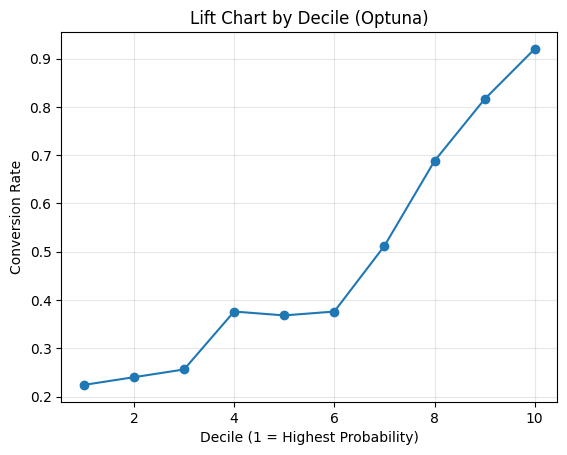


Top 10 Feature Importance (Optuna):
cat__poutcome_success    1.387977
cat__month_mar           0.968009
cat__contact_unknown    -0.844601
cat__month_oct           0.753770
cat__month_sep           0.573101
cat__job_student         0.520344
cat__housing_yes        -0.418530
cat__loan_yes           -0.387675
cat__month_dec           0.377246
num__campaign           -0.272070
dtype: float64


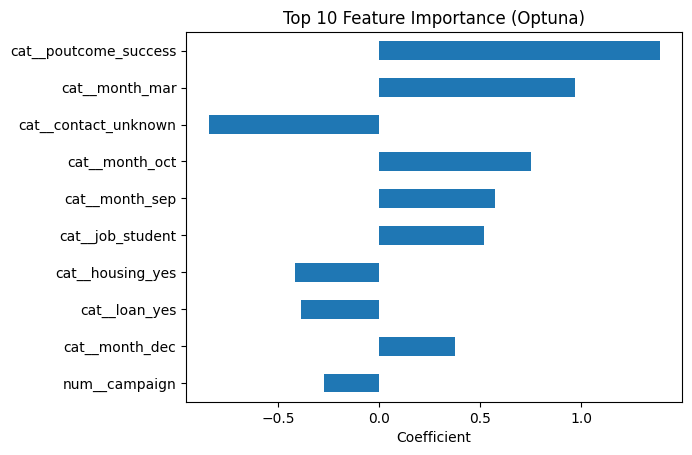

In [34]:
# Segmentasi & Lift (Optuna)
seg_opt = pd.cut(y_proba_opt, bins=[-0.01, 0.3, 0.7, 1.01], labels=['Low', 'Medium', 'High'])
df_seg_opt = pd.DataFrame({
    'actual': y_test.reset_index(drop=True),
    'pred_proba': y_proba_opt,
    'segment': seg_opt
})

print("Proporsi label per segmen:")
print(df_seg_opt.groupby('segment')['actual'].value_counts(normalize=True).unstack())
print("\nJumlah per segmen:")
print(df_seg_opt['segment'].value_counts())

# Lift
df_lift_opt = pd.DataFrame({
    'probability': y_proba_opt,
    'actual': y_test.reset_index(drop=True).map({'yes': 1, 'no': 0})
}).sort_values('probability', ascending=False)

top_n = int(0.1 * len(df_lift_opt))
cr_top = df_lift_opt.head(top_n)['actual'].mean()
cr_all = df_lift_opt['actual'].mean()
lift = cr_top / cr_all if cr_all > 0 else 0
print(f"\nTop Decile Lift (Optuna): {lift:.2f}")

# Lift chart
n_bins = 10
df_lift_opt['bin'] = pd.qcut(df_lift_opt['probability'], n_bins, labels=False, duplicates='drop')
bin_conv = df_lift_opt.groupby('bin')['actual'].mean()
plt.plot(np.arange(n_bins, 0, -1), bin_conv[::-1], marker='o')
plt.xlabel('Decile (1 = Highest Probability)')
plt.ylabel('Conversion Rate')
plt.title('Lift Chart by Decile (Optuna)')
plt.grid(alpha=.3)
plt.show()

# Feature Importance (koefisien dari fitur terpilih)
mask_sel = pipeline_optuna.named_steps['selectk'].get_support()
all_names = pipeline_optuna.named_steps['preprocessing'].get_feature_names_out()
sel_names = np.array(all_names)[mask_sel]
coefs = pipeline_optuna.named_steps['classifier'].coef_[0]

fi = pd.Series(coefs, index=sel_names).sort_values(key=np.abs, ascending=False)
print("\nTop 10 Feature Importance (Optuna):")
print(fi.head(10))

fi.head(10).plot(kind='barh')
plt.xlabel('Coefficient')
plt.title('Top 10 Feature Importance (Optuna)')
plt.gca().invert_yaxis()
plt.show()


### 6.4 Evaluation Model on Training Unseen data 

In [35]:
pipeline_optuna

Pipeline(steps=[('feature', DepositFeatureGenerator()),
                ('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays', 'is_senior',
                                                   'negative_balance',
                                                   'high_campaign',
                                                   'new_customer']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome'])])),
                ('selectk', SelectKBest(k=21)),
                ('classifier',
                 LogisticRegression(C=0.06770926501182994,
                                    class_weight='balanced', max_iter=2000,
                                    random_state=42))])

In [36]:
# Unseen eval + save model
y_unseen_pred = pipeline_optuna.predict(X_unseen)
y_unseen_proba = pipeline_optuna.predict_proba(X_unseen)[:, 1]

print("Classification Report (Unseen):")
print(classification_report(y_unseen, y_unseen_pred, digits=3))

df_unseen = pd.DataFrame({'p': y_unseen_proba, 'y': y_unseen.map({'yes':1, 'no':0})}).sort_values('p', ascending=False)
top_n_u = int(0.1 * len(df_unseen))
lift_u = df_unseen.head(top_n_u)['y'].mean() / df_unseen['y'].mean() 
print(f"Top Decile Lift (Unseen): {lift_u:.2f}") # di 10% teratas skor prediksi, kemungkinan konversi hampir 2x lebih tinggi dibanding rata-rata populasi

# Save model 
import joblib
final = joblib.dump(pipeline_optuna, 'logreg_optuna_pipeline.pkl')
print("Saved: logreg_optuna_pipeline.pkl")


Classification Report (Unseen):
              precision    recall  f1-score   support

          no      0.712     0.735     0.723       816
         yes      0.700     0.675     0.687       747

    accuracy                          0.706      1563
   macro avg      0.706     0.705     0.705      1563
weighted avg      0.706     0.706     0.706      1563

Top Decile Lift (Unseen): 1.92
Saved: logreg_optuna_pipeline.pkl


Setelah pengetesan selesai, model disimpan dan dideploy menggunakan nama logreg_optuna_pipeline.pkl

yang berisi pipeline, Preprocessing Column Transformer, dan Model Logistic Regression 

### Post Modelling

In [37]:
# Sweep threshold → pilih yang terbaik menurut F1 dan menurut biaya bisnis
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_recall_curve

y_true_bin = (y_test == 'yes').astype(int).values
proba = y_proba_opt

# 1) F1-optimal threshold
prec, rec, thr = precision_recall_curve(y_true_bin, proba)
f1s = (2*prec*rec)/(prec+rec+1e-12)
th_f1 = thr[np.argmax(f1s[:-1])] if len(thr) else 0.5

# 2) Cost-based threshold 
C_FN = 500   # rugi kalau fraud/positif terlewat (atau lost opportunity)
C_FP = 50    # biaya salah target
grid = np.linspace(0.05, 0.95, 181)
best_cost, best_thr = -1e18, 0.5
for t in grid:
    yhat = (proba >= t).astype(int)
    TP = ((yhat==1) & (y_true_bin==1)).sum()
    FP = ((yhat==1) & (y_true_bin==0)).sum()
    FN = ((yhat==0) & (y_true_bin==1)).sum()
    profit = TP*C_FN - FP*C_FP - FN*C_FN  
    if profit > best_cost:
        best_cost, best_thr = profit, t

print(f"Best threshold (F1): {th_f1:.3f}")
print(f"Best threshold (Cost): {best_thr:.3f}  | Profit proxy: {best_cost:.0f}")
THRESHOLD = best_thr  

Best threshold (F1): 0.410
Best threshold (Cost): 0.110  | Profit proxy: 265350


In [38]:

from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import StratifiedKFold

cal_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)         
calibrated = CalibratedClassifierCV(
    estimator=pipeline_optuna.named_steps['classifier'],
    method='isotonic',
    cv=cal_cv
)

from sklearn.pipeline import Pipeline
pipe_cal = Pipeline([
    ('feature', pipeline_optuna.named_steps['feature']),
    ('preprocessing', pipeline_optuna.named_steps['preprocessing']),
    ('selectk', pipeline_optuna.named_steps['selectk']),
    ('classifier', calibrated)
])

pipe_cal.fit(X_train, y_train)
y_proba_cal = pipe_cal.predict_proba(X_test)[:,1]

USE_CALIBRATED = True
PROBA_FINAL = y_proba_cal if USE_CALIBRATED else y_proba_opt


In [39]:
pipe_cal

Pipeline(steps=[('feature', DepositFeatureGenerator()),
                ('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays', 'is_senior',
                                                   'negative_balance',
                                                   'high_campaign',
                                                   'new_customer']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(f...
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome'])])),
                ('selectk', SelectKBest(k=21)),
                ('classifier',
                 CalibratedClassifierCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                        estimator=LogisticRegression(C=0.06770926501182994,
                                                                     class_weight='balanced',
                                                                     max_iter=2000,
                                                                     random_state=42),
                                        method='isotonic'))])

In [40]:
proba_use = PROBA_FINAL if 'PROBA_FINAL' in globals() else y_proba_opt
pred_use = (proba_use >= THRESHOLD).astype(int)

lead_df = X_test.copy()
lead_df['actual'] = y_test.values
lead_df['proba'] = proba_use
lead_df['pred'] = np.where(pred_use==1, 'yes', 'no')
lead_df['segment'] = pd.cut(
    lead_df['proba'], bins=[-0.01, 0.3, 0.7, 1.01],
    labels=['Low','Medium','High']
)

lead_df = lead_df.sort_values('proba', ascending=False).reset_index(drop=True)
lead_df.head(10)

# Export
lead_df.to_csv('lead_scored_test.csv', index=False)
print("✅ Exported: lead_scored_test.csv")


✅ Exported: lead_scored_test.csv


In [41]:
import joblib, json, time

artifact = {
    'model_file': 'logreg_optuna_pipeline.pkl',
    'use_calibrated': bool('PROBA_FINAL' in globals() and USE_CALIBRATED),
    'threshold': float(THRESHOLD),
    'created_at': time.strftime('%Y-%m-%d %H:%M:%S'),
    'class_mapping': {'no':0, 'yes':1}
}

# Simpan pipeline yang dipakai produksi
model_to_save = pipe_cal if artifact['use_calibrated'] else pipeline_optuna
joblib.dump(model_to_save, artifact['model_file'])
with open('model_metadata.json','w') as f:
    json.dump(artifact, f, indent=2)

print("✅ Saved model & metadata:", artifact)


✅ Saved model & metadata: {'model_file': 'logreg_optuna_pipeline.pkl', 'use_calibrated': True, 'threshold': 0.10999999999999999, 'created_at': '2025-08-11 18:16:44', 'class_mapping': {'no': 0, 'yes': 1}}


In [42]:

def load_model_and_predict(df_new: pd.DataFrame):
    mdl = joblib.load('logreg_optuna_pipeline.pkl')
    with open('model_metadata.json') as f:
        meta = json.load(f)
    proba = mdl.predict_proba(df_new)[:,1]
    pred = (proba >= meta['threshold']).astype(int)
    out = df_new.copy()
    out['proba'] = proba
    out['pred']  = pred
    return out, meta

In [43]:
# Lihat FN & FP untuk insight
y_true_bin = (y_test=='yes').astype(int).values
pred_bin = (proba_use >= THRESHOLD).astype(int)

test_dbg = X_test.copy()
test_dbg['actual'] = y_true_bin
test_dbg['proba'] = proba_use
test_dbg['pred'] = pred_bin

FN = test_dbg[(test_dbg['actual']==1) & (test_dbg['pred']==0)].sort_values('proba')
FP = test_dbg[(test_dbg['actual']==0) & (test_dbg['pred']==1)].sort_values('proba', ascending=False)

print("FN samples (top 10 paling rawan lolos):")
display(FN.head(10))
print("FP samples (top 10 paling salah target):")
display(FP.head(10))


FN samples (top 10 paling rawan lolos):


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,is_senior,negative_balance,high_campaign,new_customer,actual,proba,pred
41,46,housemaid,271,yes,no,cellular,jul,29,-1,unknown,0,0,1,1,1,0.032433,0
134,35,technician,5724,yes,no,unknown,may,10,-1,unknown,0,0,1,1,1,0.101077,0


FP samples (top 10 paling salah target):


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,is_senior,negative_balance,high_campaign,new_customer,actual,proba,pred
1120,28,student,1925,no,no,cellular,feb,1,93,success,0,0,0,0,0,0.959298,1
35,65,retired,493,no,no,cellular,oct,1,182,failure,1,0,0,0,0,0.931161,1
1060,30,unemployed,1159,no,no,cellular,aug,1,68,success,0,0,0,0,0,0.911978,1
720,43,unemployed,1854,no,no,cellular,nov,2,197,success,0,0,0,0,0,0.907019,1
1102,27,technician,11862,no,no,telephone,may,5,101,success,0,0,0,0,0,0.882624,1
412,30,management,314,no,no,cellular,nov,2,175,success,0,0,0,0,0,0.871393,1
819,76,retired,163,no,no,telephone,oct,1,-1,unknown,1,0,0,1,0,0.869854,1
791,53,technician,2557,no,no,cellular,jul,4,182,success,0,0,0,0,0,0.865852,1
1076,27,student,672,no,no,cellular,mar,2,-1,unknown,0,0,0,1,0,0.850257,1
900,25,admin.,483,no,yes,cellular,apr,1,86,success,0,0,0,0,0,0.826368,1


In [ ]:

X_unseen_processed = X_unseen.copy() 
# y_unseen_true = y_unseen.map({0:'no', 1:'yes'}).copy()

y_unseen_proba = pipe_cal.predict_proba(X_unseen_processed)[:, 1]

df_eval = pd.DataFrame({
    "actual": y_unseen.map({'no':0, 'yes':1}),
    "proba": y_unseen_proba
})

In [ ]:
# === BUSINESS IMPACT SIMULATION ===
# Prasyarat:
# - df_eval: DataFrame evaluasi berisi kolom minimal:
#   actual (0/1), proba (0..1). Jika sudah ada pred (0/1), boleh; kalau tidak, akan dihitung dari threshold.
# - Parameter biaya & nilai bisnis: isi sesuai real bisnis.

import numpy as np
import pandas as pd


def confusion_counts(y_true, y_pred):
    y_true = np.asarray(y_true).astype(int)
    y_pred = np.asarray(y_pred).astype(int)
    TP = int(((y_true == 1) & (y_pred == 1)).sum())
    FP = int(((y_true == 0) & (y_pred == 1)).sum())
    FN = int(((y_true == 1) & (y_pred == 0)).sum())
    TN = int(((y_true == 0) & (y_pred == 0)).sum())
    return TP, FP, FN, TN

# ----------------------
# Baseline calculators
# ----------------------
def baseline_call_all(y_true):
    """Baseline telepon semua orang."""
    y_pred_base = np.ones_like(y_true, dtype=int)
    TP, FP, FN, TN = confusion_counts(y_true, y_pred_base)
    return {
        "name": "Call-All",
        "calls": int(len(y_true)),
        "TP": TP, "FP": FP, "FN": FN, "TN": TN
    }

def baseline_random_same_volume(y_true, calls, rng=42):
    """Baseline telpon acak sebanyak 'calls' orang (ekspektasi).
       Diestimasi dengan sampling ulang agar stabil."""
    rs = np.random.RandomState(rng)
    n = len(y_true)
    reps = 200
    tp_list, fp_list = [], []
    for _ in range(reps):
        idx = rs.choice(n, size=min(calls, n), replace=False)
        tp_list.append(int(np.asarray(y_true)[idx].sum()))
        fp_list.append(int(calls - tp_list[-1]))
    TP = int(np.mean(tp_list))
    FP = int(np.mean(fp_list))
    FN = int((np.asarray(y_true)==1).sum() - TP)
    TN = int(n - calls - FN)
    return {
        "name": f"Random-{calls}",
        "calls": int(calls),
        "TP": TP, "FP": FP, "FN": FN, "TN": TN
    }

# ----------------------
# Simulator inti
# ----------------------
def simulate_threshold(df_eval, threshold, cost_per_call, avg_deposit_value, impl_cost=0.0,
                       baseline="call_all", random_seed=42):
    """Simulasi berbasis threshold proba."""
    y_true = df_eval["actual"].astype(int).values
    y_pred = (df_eval["proba"].values >= threshold).astype(int)

    TP, FP, FN, TN = confusion_counts(y_true, y_pred)
    calls_model = int(y_pred.sum())

    # Baseline
    if baseline == "call_all":
        base = baseline_call_all(y_true)
    elif baseline == "random_same_volume":
        base = baseline_random_same_volume(y_true, calls_model, rng=random_seed)
    else:
        raise ValueError("baseline harus 'call_all' atau 'random_same_volume'")

    # Biaya & pendapatan
    rev_model  = TP * avg_deposit_value
    cost_model = calls_model * cost_per_call + impl_cost
    profit_model = rev_model - cost_model

    rev_base  = base["TP"] * avg_deposit_value
    cost_base = base["calls"] * cost_per_call  
    profit_base = rev_base - cost_base

    # Delta
    cost_saving = cost_base - cost_model
    revenue_uplift = rev_model - rev_base
    incremental_profit = profit_model - profit_base
    # ROI versi proyek: laba tambahan / biaya proyek (impl_cost)
    ROI_project = np.nan if impl_cost == 0 else incremental_profit / impl_cost
    # ROI versi total biaya: laba tambahan / (impl_cost + biaya_call_model)
    ROI_total_cost = incremental_profit / max(cost_model, 1e-9)

    summary = pd.DataFrame([
        {
            "Strategy": "MODEL",
            "Threshold": threshold,
            "Calls": calls_model, "TP": TP, "FP": FP, "FN": FN, "TN": TN,
            "Revenue": rev_model, "Cost": cost_model, "Profit": profit_model
        },
        {
            "Strategy": f"BASELINE-{base['name']}",
            "Threshold": np.nan,
            "Calls": base["calls"], "TP": base["TP"], "FP": base["FP"], "FN": base["FN"], "TN": base["TN"],
            "Revenue": rev_base, "Cost": cost_base, "Profit": profit_base
        }
    ])

    kpis = {
        "cost_saving": cost_saving,
        "revenue_uplift": revenue_uplift,
        "incremental_profit": incremental_profit,
        "ROI_project": ROI_project,
        "ROI_total_cost": ROI_total_cost
    }
    return summary, kpis

def simulate_topK(df_eval, k_frac, cost_per_call, avg_deposit_value, impl_cost=0.0,
                  baseline="call_all", random_seed=42):
    """Simulasi telepon Top-K% berdasarkan proba (Top Decile = 0.10)."""
    assert 0 < k_frac <= 1
    y_true = df_eval["actual"].astype(int).values
    n = len(df_eval)
    k = max(int(np.ceil(k_frac * n)), 1)

    # Sort by proba desc, call top-k
    order = np.argsort(-df_eval["proba"].values)
    called_idx = order[:k]
    y_pred = np.zeros(n, dtype=int)
    y_pred[called_idx] = 1

    TP, FP, FN, TN = confusion_counts(y_true, y_pred)
    calls_model = int(y_pred.sum())

    # Baseline
    if baseline == "call_all":
        base = baseline_call_all(y_true)
    elif baseline == "random_same_volume":
        base = baseline_random_same_volume(y_true, calls_model, rng=random_seed)
    else:
        raise ValueError("baseline harus 'call_all' atau 'random_same_volume'")

    # Biaya & pendapatan
    rev_model  = TP * avg_deposit_value
    cost_model = calls_model * cost_per_call + impl_cost
    profit_model = rev_model - cost_model

    rev_base  = base["TP"] * avg_deposit_value
    cost_base = base["calls"] * cost_per_call
    profit_base = rev_base - cost_base

    # Delta
    cost_saving = cost_base - cost_model
    revenue_uplift = rev_model - rev_base
    incremental_profit = profit_model - profit_base
    ROI_project = np.nan if impl_cost == 0 else incremental_profit / impl_cost
    ROI_total_cost = incremental_profit / max(cost_model, 1e-9)

    summary = pd.DataFrame([
        {
            "Strategy": f"MODEL-Top{int(k_frac*100)}%",
            "Threshold": np.nan,
            "Calls": calls_model, "TP": TP, "FP": FP, "FN": FN, "TN": TN,
            "Revenue": rev_model, "Cost": cost_model, "Profit": profit_model
        },
        {
            "Strategy": f"BASELINE-{base['name']}",
            "Threshold": np.nan,
            "Calls": base["calls"], "TP": base["TP"], "FP": base["FP"], "FN": base["FN"], "TN": base["TN"],
            "Revenue": rev_base, "Cost": cost_base, "Profit": profit_base
        }
    ])

    # Tambahan: hitung Lift aktual dari top-K
    base_rate = y_true.mean()
    top_rate = y_true[called_idx].mean() if calls_model > 0 else 0.0
    lift = (top_rate / base_rate) if base_rate > 0 else np.nan

    kpis = {
        "cost_saving": cost_saving,
        "revenue_uplift": revenue_uplift,
        "incremental_profit": incremental_profit,
        "ROI_project": ROI_project,
        "ROI_total_cost": ROI_total_cost,
        "lift_topK": lift
    }
    return summary, kpis

# ----------------------
# CONTOH PEMAKAIAN
# ----------------------
# PARAMETER BISNIS: Menggunakan angka Asumsi
cost_per_call = 5_000          # Rp per panggilan 
avg_deposit_value = 1_500_000  # Rp nilai rata-rata deposit per konversi 
impl_cost = 5_000_000          # Rp total biaya implementasi proyek 

# MODE A: THRESHOLD
THRESHOLD = 0.11
summary_thr, kpis_thr = simulate_threshold(
    df_eval=df_eval,
    threshold=THRESHOLD,
    cost_per_call=cost_per_call,
    avg_deposit_value=avg_deposit_value,
    impl_cost=impl_cost,
    baseline="random_same_volume"   # atau "call_all"
)
display(summary_thr)
print("\nKPIs (Threshold):", kpis_thr)

# MODE B: TOP-K (Top Decile)
K_FRAC = 0.10
summary_topk, kpis_topk = simulate_topK(
    df_eval=df_eval,
    k_frac=K_FRAC,
    cost_per_call=cost_per_call,
    avg_deposit_value=avg_deposit_value,
    impl_cost=impl_cost,
    baseline="random_same_volume"   # atau "call_all"
)
display(summary_topk)
print("\nKPIs (Top-K):", kpis_topk)


,Strategy,Threshold,Calls,TP,FP,FN,TN,Revenue,Cost,Profit
0,MODEL,0.11,1541,743,798,4,18,1114500000,12705000,1101795000
1,BASELINE-Random-1541,NaN,1541,736,804,11,11,1104000000,7705000,1096295000



KPIs (Threshold): {'cost_saving': -5000000, 'revenue_uplift': 10500000, 'incremental_profit': 5500000, 'ROI_project': 1.1, 'ROI_total_cost': 0.4329004329004329}


,Strategy,Threshold,Calls,TP,FP,FN,TN,Revenue,Cost,Profit
0,MODEL-Top10%,NaN,157,142,15,605,801,213000000,5785000,207215000
1,BASELINE-Random-157,NaN,157,75,81,672,734,112500000,785000,111715000



KPIs (Top-K): {'cost_saving': -5000000, 'revenue_uplift': 100500000, 'incremental_profit': 95500000, 'ROI_project': 19.1, 'ROI_total_cost': 16.50821089023336, 'lift_topK': np.float64(1.89246156600926)}
